In [1]:
import numpy as np
import pyhf
import matplotlib.pyplot as plt
from pyhf.contrib.viz import brazil

In [2]:
model = pyhf.simplemodels.hepdata_like([5, 10], [50, 30], [2, 3])
data = [55, 33] + model.config.auxdata
parameters = [1.0, 1.0, 1.0]  # nominal parameters

In [3]:
model.logpdf(parameters, data)  # evaluate log likelihood

array([-13.60586994])

In [4]:
test_poi = 1.0
CLs_obs, CLs_exp = pyhf.infer.hypotest(test_poi, data, model, return_expected_set=True)

print(f"      Observed CLs: {CLs_obs:.4f}")
for expected_value, n_sigma in zip(CLs_exp, np.arange(-2, 3)):
    print(f"Expected CLs({n_sigma:2d} σ): {expected_value:.4f}")

      Observed CLs: 0.2280
Expected CLs(-2 σ): 0.0062
Expected CLs(-1 σ): 0.0267
Expected CLs( 0 σ): 0.1025
Expected CLs( 1 σ): 0.3131
Expected CLs( 2 σ): 0.6582


In [5]:
poi_vals = np.linspace(0, 5, 41)
obs_limit, exp_limits, (scan, results) = pyhf.infer.intervals.upperlimit(
    data, model, poi_vals, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit:.4f}")
print(f"Upper limit (exp): μ = {exp_limits[2]:.4f}")

Upper limit (obs): μ = 1.5534
Upper limit (exp): μ = 1.2184


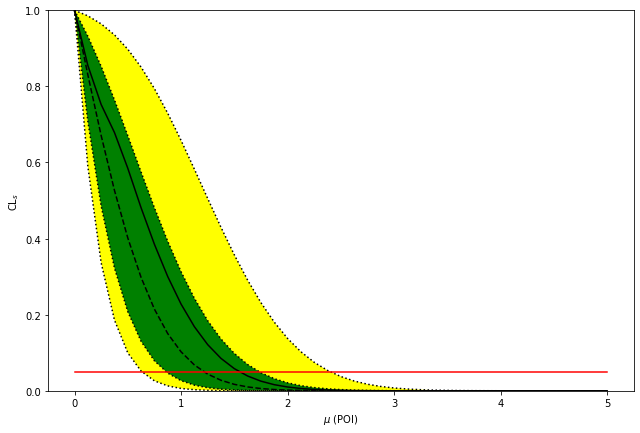

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(10.5, 7)
brazil.plot_results(ax, poi_vals, results)